In [1]:
pip install numpy pandas scikit-learn matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [13]:
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LinearRegression
    from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
    from scipy import stats

Primeras filas del dataset:
                           name  year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3     Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4        Maruti Swift VXI BSIII  2007         130000     120000  Petrol   

  seller_type transmission         owner     mileage   engine   max_power  \
0  Individual       Manual   First Owner   23.4 kmpl  1248 CC      74 bhp   
1  Individual       Manual  Second Owner  21.14 kmpl  1498 CC  103.52 bhp   
2  Individual       Manual   Third Owner   17.7 kmpl  1497 CC      78 bhp   
3  Individual       Manual   First Owner   23.0 kmpl  1396 CC      90 bhp   
4  Individual       Manual   First Owner   16.1 kmpl  1298 CC    88.2 bhp   

                     torque  seats  
0            190Nm@ 2

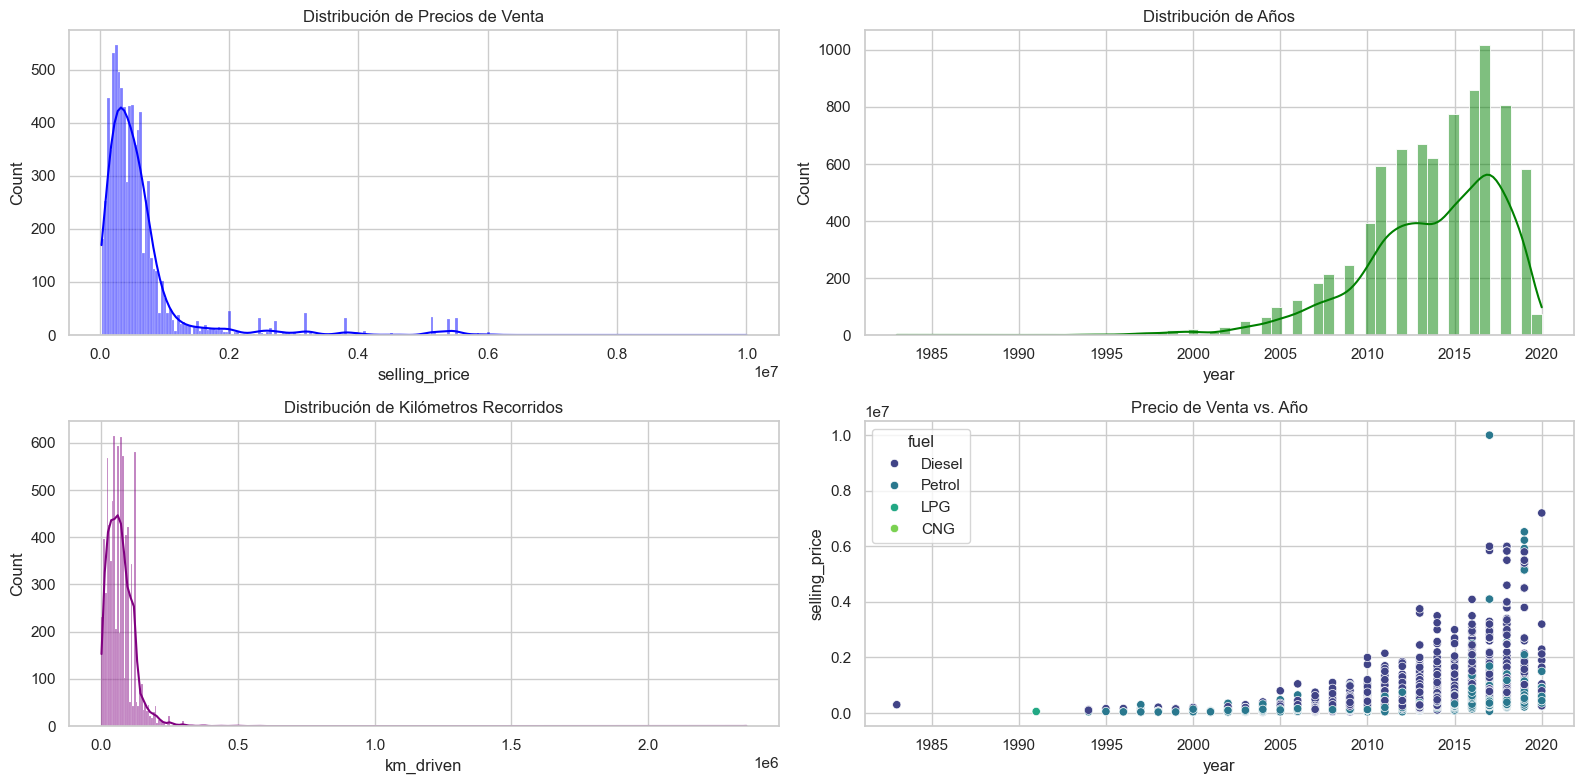

(None,
               year  selling_price     km_driven        seats
 count  8128.000000   8.128000e+03  8.128000e+03  7907.000000
 mean   2013.804011   6.382718e+05  6.981951e+04     5.416719
 std       4.044249   8.062534e+05  5.655055e+04     0.959588
 min    1983.000000   2.999900e+04  1.000000e+00     2.000000
 25%    2011.000000   2.549990e+05  3.500000e+04     5.000000
 50%    2015.000000   4.500000e+05  6.000000e+04     5.000000
 75%    2017.000000   6.750000e+05  9.800000e+04     5.000000
 max    2020.000000   1.000000e+07  2.360457e+06    14.000000)

In [7]:
from pathlib import Path
file_path = Path(r'C:\Users\jarly\OneDrive\Documentos\UNAD\Análisis de Datos\Fase 3\Anexo 2 - Dataset Vehicle\Car_details_v3.csv')

df = pd.read_csv(file_path)

print("Primeras filas del dataset:")
print(df.head())
print("\nInformación del dataset:")
print(df.info())
print("\nEstadísticas descriptivas:")
print(df.describe())

# Configurar estilo de gráficos
sns.set(style="whitegrid")

# Información general del dataset
data_info = df.info()

# Resumen estadístico de las columnas numéricas
data_describe = df.describe()

# Graficar distribuciones para algunas variables clave
plt.figure(figsize=(16, 8))

# Distribución de precios de venta
plt.subplot(2, 2, 1)
sns.histplot(df['selling_price'], kde=True, color="blue")
plt.title('Distribución de Precios de Venta')

# Distribución de años
plt.subplot(2, 2, 2)
sns.histplot(df['year'], kde=True, color="green")
plt.title('Distribución de Años')

# Distribución de km_driven
plt.subplot(2, 2, 3)
sns.histplot(df['km_driven'], kde=True, color="purple")
plt.title('Distribución de Kilómetros Recorridos')

# Relación entre precio de venta y año
plt.subplot(2, 2, 4)
sns.scatterplot(data=df, x='year', y='selling_price', hue='fuel', palette='viridis')
plt.title('Precio de Venta vs. Año')

plt.tight_layout()
plt.show()

data_info, data_describe


In [45]:
# Limpiar y transformar columnas

# Eliminar unidades de las columnas `mileage`, `engine`, `max_power`
# y convertirlas a valores numéricos.
df['mileage'] = df['mileage'].astype(str).str.extract(r'(\d+\.\d+|\d+)').astype(float)
df['engine'] = df['engine'].astype(str).str.extract(r'(\d+)').astype(float)
df['max_power'] = df['max_power'].astype(str).str.extract(r'(\d+\.\d+|\d+)').astype(float)

# Llenar valores faltantes con la mediana para las columnas numéricas
df['mileage'] = df['mileage'].fillna(df['mileage'].median())
df['engine'] = df['engine'].fillna(df['engine'].median())
df['max_power'] = df['max_power'].fillna(df['max_power'].median())
df['seats'] = df['seats'].fillna(df['seats'].median())

# Verificar el resultado de la limpieza
df.info(), df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        8128 non-null   float64
 9   engine         8128 non-null   float64
 10  max_power      8128 non-null   float64
 11  torque         7906 non-null   object 
 12  seats          8128 non-null   float64
dtypes: float64(4), int64(3), object(6)
memory usage: 825.6+ KB


(None,
               year  selling_price     km_driven      mileage      engine  \
 count  8128.000000   8.128000e+03  8.128000e+03  8128.000000  8128.00000   
 mean   2013.804011   6.382718e+05  6.981951e+04    19.415554  1452.89813   
 std       4.044249   8.062534e+05  5.655055e+04     3.981922   498.19672   
 min    1983.000000   2.999900e+04  1.000000e+00     0.000000   624.00000   
 25%    2011.000000   2.549990e+05  3.500000e+04    16.800000  1197.00000   
 50%    2015.000000   4.500000e+05  6.000000e+04    19.300000  1248.00000   
 75%    2017.000000   6.750000e+05  9.800000e+04    22.277500  1582.00000   
 max    2020.000000   1.000000e+07  2.360457e+06    42.000000  3604.00000   
 
          max_power        seats  
 count  8128.000000  8128.000000  
 mean     91.264982     5.405389  
 std      35.376388     0.948874  
 min       0.000000     2.000000  
 25%      68.100000     5.000000  
 50%      82.000000     5.000000  
 75%     101.250000     5.000000  
 max     400.00000

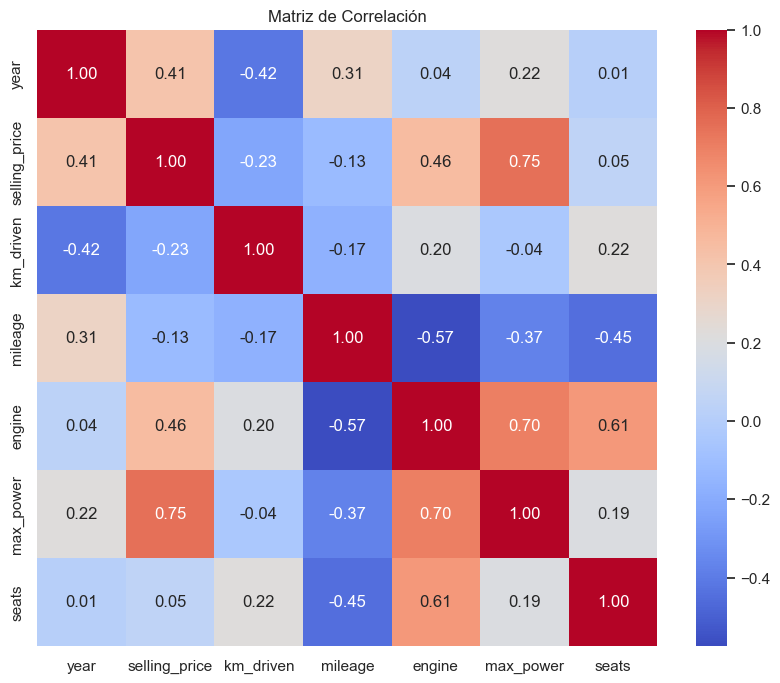

In [49]:

# Seleccionar solo las columnas numéricas
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación en las columnas numéricas
correlation_matrix = numeric_df.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()



In [15]:
#  Detección de Valores Atípicos
# Usamos el método Z-score para identificar valores atípicos
outliers = {}
for col in df.select_dtypes(include='number').columns:
    z_scores = np.abs(stats.zscore(df[col]))
    outliers[col] = df[col][z_scores > 3]
    print(f"\nValores atípicos en la columna {col}:\n", outliers[col])


Valores atípicos en la columna year:
 7       2001
177     1999
186     2000
316     1983
774     1999
        ... 
7982    2000
7996    2000
8025    1998
8042    1997
8115    1997
Name: year, Length: 81, dtype: int64

Valores atípicos en la columna selling_price:
 131     3975000
132     5150000
133     3200000
134     4100000
135     4500000
         ...   
7860    3200000
7862    3800000
7872    5400000
7873    5500000
7930    5500000
Name: selling_price, Length: 229, dtype: int64

Valores atípicos en la columna km_driven:
 394     240000
401     265000
461     250000
886     300000
998     360003
         ...  
7645    250000
7945    250000
7969    250000
8030    300000
8077    250000
Name: km_driven, Length: 72, dtype: int64

Valores atípicos en la columna seats:
 Series([], Name: seats, dtype: float64)


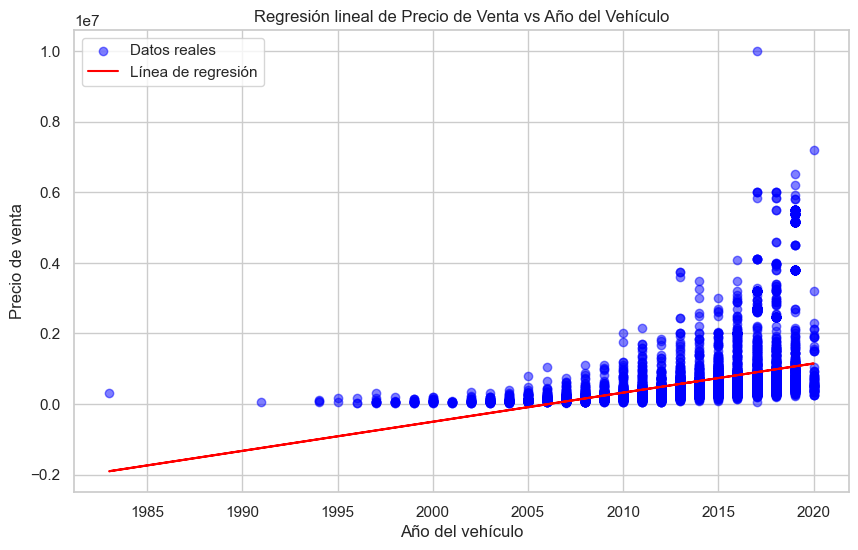

In [59]:
from sklearn.linear_model import LinearRegression

# Seleccionamos la colunma year pa realizar la correlación
X_year = X[['year']]
y = df['selling_price']

# Crear y ajustar el modelo de regresión lineal solo con 'year'
linear_model_year = LinearRegression()
linear_model_year.fit(X_year, y)

# Hacer predicciones con el modelo
y_pred_year = linear_model_year.predict(X_year)

# Graficar los datos reales y la línea de regresión
plt.figure(figsize=(10, 6))
plt.scatter(X_year, y, color='blue', label="Datos reales", alpha=0.5)
plt.plot(X_year, y_pred_year, color='red', label="Línea de regresión")

# Agregar etiquetas y título
plt.xlabel("Año del vehículo")
plt.ylabel("Precio de venta")
plt.title("Regresión lineal de Precio de Venta vs Año del Vehículo")
plt.legend()
plt.show()

